In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Import Libraries

In [ ]:
import os
import zipfile
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from random import shuffle
%matplotlib inline

2. Shuffle And Visualize Dataset's Distribution

In [ ]:
local_zip = '/content/drive/MyDrive/data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
image_list = os.listdir("/content/data")
shuffle(image_list)

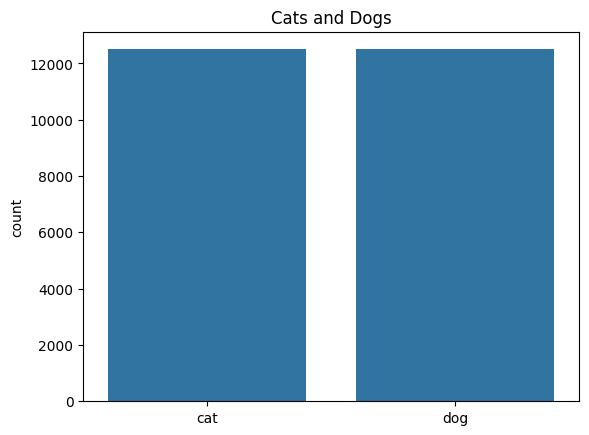

In [ ]:
def plot_image_list_count(image_list):
    labels = []
    for img in image_list:
        labels.append(img.split('.')[-3])
    sns.countplot(x=labels, orient='v')
    plt.title('Cats and Dogs')

plot_image_list_count(image_list)

3. Extract, Transform & Load To New Data Folders

In [ ]:
def label_image(img):
    pet = img.split('.')[-3]
    if pet == 'cat': return 0
    elif pet == 'dog': return 1

In [ ]:
def process_data(image_list, output_folder):
    for img_filename in tqdm(image_list):
        img_path = os.path.join("./data/", img_filename)
        label = label_image(img_filename)
        img = Image.open(img_path)

        if label == 0:
            output_dir = os.path.join(output_folder, 'cat')
        else:
            output_dir = os.path.join(output_folder, 'dog')

        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

        img.save(os.path.join(output_dir, img_filename))

In [ ]:
train_data, test_data = train_test_split(image_list, test_size=0.2, random_state=42)
test_data, val_data = train_test_split(test_data, test_size=0.5, random_state=42)

In [ ]:
process_data(train_data, './data_folder/train')
process_data(test_data, './data_folder/test')
process_data(val_data, './data_folder/val')

4. Visualization


In [ ]:
train_cat_dir = './data_folder/train/cat/'
train_dog_dir = './data_folder/train/dog/'

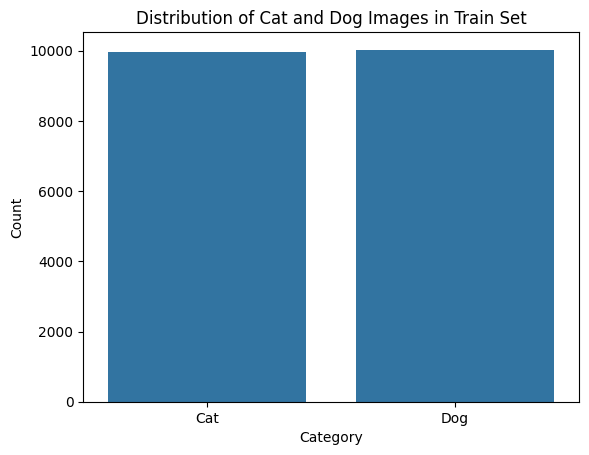

In [ ]:

def visualize_distribution(cat_dir, dog_dir):
    num_train_cat = len(os.listdir(cat_dir))
    num_train_dog = len(os.listdir(dog_dir))

    sns.barplot(x=['Cat', 'Dog'], y=[num_train_cat, num_train_dog])
    plt.title('Distribution of Cat and Dog Images in Train Set')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.show()

visualize_distribution(train_cat_dir, train_dog_dir)


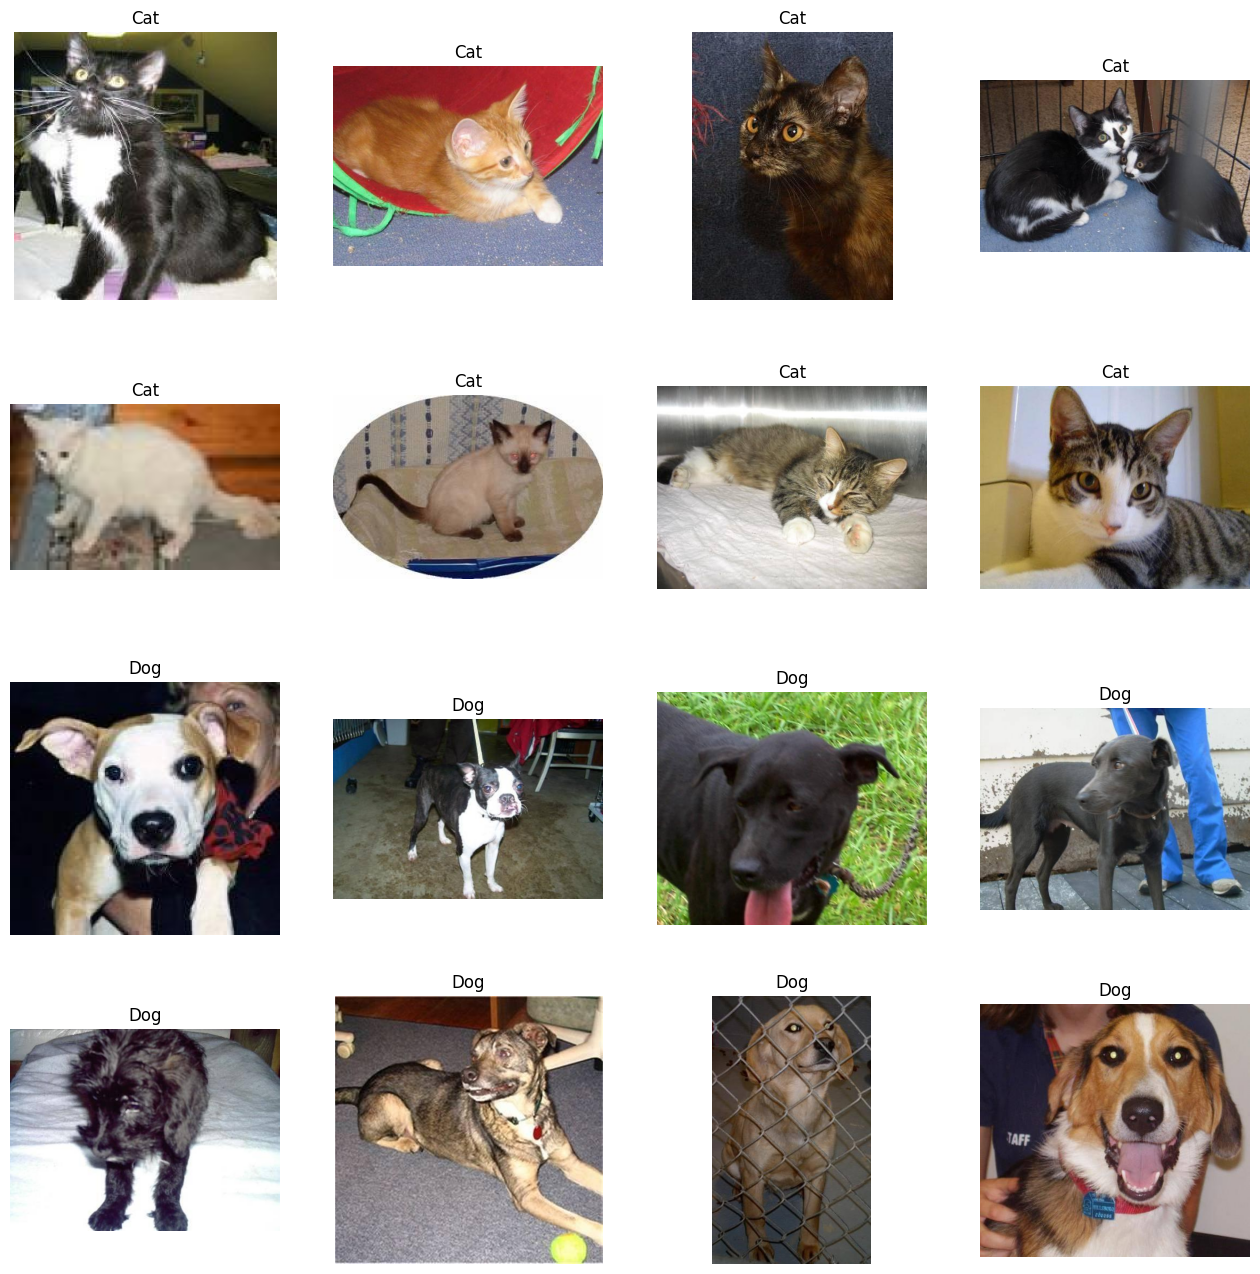

In [ ]:
nrows = 4
ncols = 4

train_dir = os.path.join('/content/data_folder', 'train')
train_cats_dir = os.path.join(train_dir, 'cat')
train_dogs_dir = os.path.join(train_dir, 'dog')

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
pic_index = 100
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[pic_index - 8:pic_index]
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[pic_index - 8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    label = "Cat" if "cat" in img_path else "Dog"
    plt.imshow(img)
    plt.title(label, fontsize=12)

plt.show()


In [ ]:

import imghdr
from PIL import Image
import os
import pandas as pd
import matplotlib.pyplot as plt

cat_folder_path = "./data_folder/train/cat"
dog_folder_path = "./data_folder/train/dog"


In [ ]:
def get_image_info(folder_path):
    pic_info = {}
    for file_name in os.listdir(folder_path):
        path = os.path.join(folder_path, file_name)
        if os.path.isfile(path) and imghdr.what(path) is not None:
            if file_name not in pic_info:
                with Image.open(path) as img:
                    pic_info[file_name] = img.size
    return pic_info

def visualize_distribution(folder_path, label):
    pic_info = get_image_info(folder_path)
    widths = [shape[0] for shape in pic_info.values()]
    heights = [shape[1] for shape in pic_info.values()]

    df = pd.DataFrame({'width': widths, 'height': heights})
    print(f"Summary statistics for {label} images:")
    print(df.describe())

    df.hist(column=['width', 'height'], bins=30, color='blue', alpha=0.7, figsize=(10, 5))
    plt.suptitle(f'{label} Image Size Distribution')
    plt.show()


Summary statistics for Cat images:
             width       height
count  9972.000000  9972.000000
mean    410.324609   356.197553
std     107.999326    96.607996
min      50.000000    32.000000
25%     333.000000   299.000000
50%     469.000000   374.000000
75%     499.000000   406.000000
max    1023.000000   768.000000


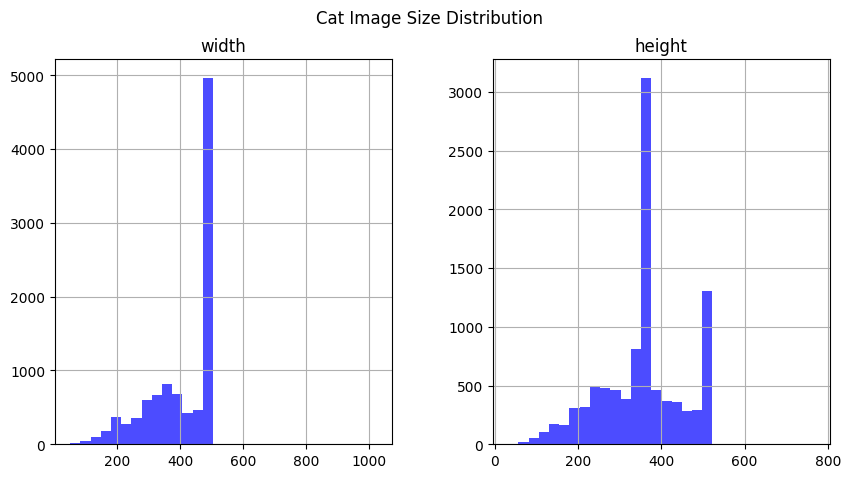

In [ ]:
visualize_distribution(cat_folder_path, 'Cat')

Summary statistics for Dog images:
              width        height
count  10028.000000  10028.000000
mean     397.512764    365.875249
std      109.493559     97.293073
min       42.000000     33.000000
25%      319.000000    311.000000
50%      421.000000    374.000000
75%      499.000000    437.000000
max     1050.000000    702.000000


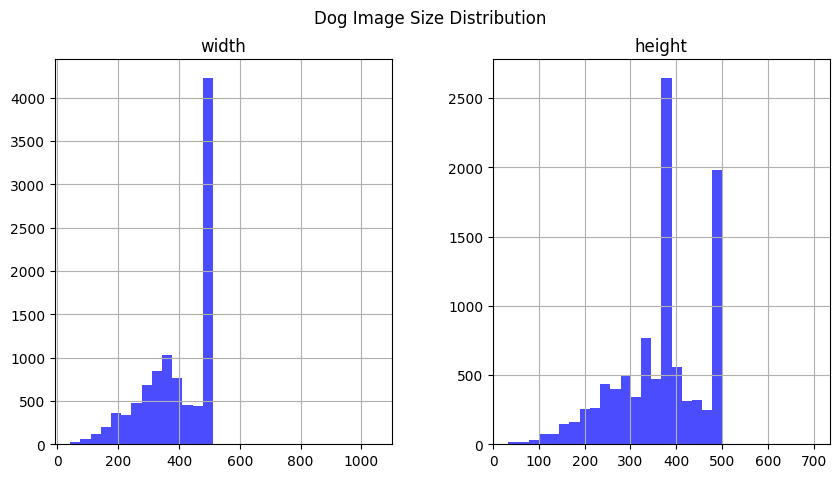

In [ ]:
visualize_distribution(dog_folder_path, 'Dog')

In [ ]:
def visualize_smallest_largest(folder_path, label):
    pic_info = get_image_info(folder_path)

    smallest_width_img = min(pic_info, key=lambda x: pic_info[x][0])
    largest_width_img = max(pic_info, key=lambda x: pic_info[x][0])

    fig, axs = plt.subplots(1, 2, figsize=(10, 6))

    smallest_img = mpimg.imread(os.path.join(folder_path, smallest_width_img))
    axs[0].imshow(smallest_img)
    axs[0].set_title(f"Smallest Width | {smallest_width_img}")

    largest_img = mpimg.imread(os.path.join(folder_path, largest_width_img))
    axs[1].imshow(largest_img)
    axs[1].set_title(f"Largest Width | {largest_width_img}")

    plt.suptitle(f'{label} Image: Smallest and Largest Width')
    plt.show()

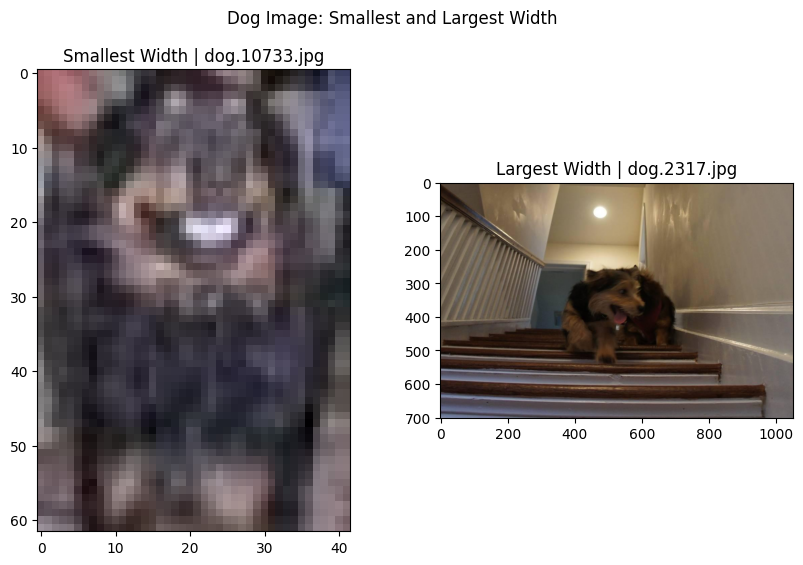

In [ ]:
visualize_smallest_largest(dog_folder_path, 'Dog')

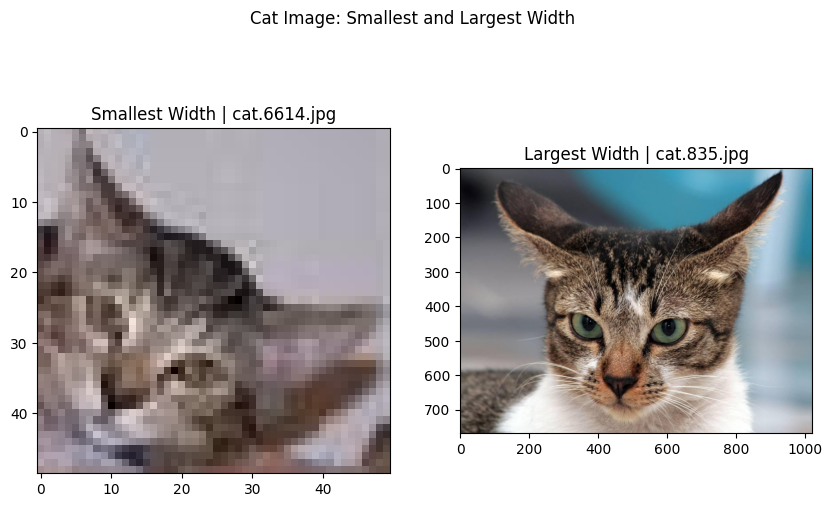

In [ ]:
visualize_smallest_largest(cat_folder_path, 'Cat')

In [ ]:
def zip_folder(folder_path, zip_path):
    with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), folder_path))

folder_path = "/content/data_folder"
zip_path = "/content/drive/MyDrive/fdata_folder.zip"

zip_folder(folder_path, zip_path)